In [363]:
import collections
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import cv2
import opencv_jupyter_ui
import matplotlib.pyplot as plt
from collections import defaultdict
import calendar

In [364]:
#Read in the data
data = pd.read_csv("Lekagul Sensor Data.csv")
data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [365]:
#Check each column's data type
data.dtypes

Timestamp    object
car-id       object
car-type     object
gate-name    object
dtype: object

In [366]:
#Check for nulls
data.isna().sum()

Timestamp    0
car-id       0
car-type     0
gate-name    0
dtype: int64

In [367]:
#Change variables to appropriate type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['car-type'] = data['car-type'].astype('category')
data['gate-name'] = data['gate-name'].astype('category')
data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [368]:
#Check each column's data type again
data.dtypes

Timestamp    datetime64[ns]
car-id               object
car-type           category
gate-name          category
dtype: object

In [369]:
#Describe the statistics of the base data
data.describe()

/var/folders/cr/vfq_sd4d21n4gk63s5b8v_dh0000gn/T/ipykernel_13570/1434461059.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Timestamp,car-id,car-type,gate-name
count,171477,171477,171477,171477
unique,170298,18708,7,40
top,2015-07-31 12:00:02,20154519024544-322,1,general-gate7
freq,5,281,67698,16119
first,2015-05-01 00:43:28,NaN,NaN,NaN
last,2016-05-31 23:56:06,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'Timestamp'}>]], dtype=object)

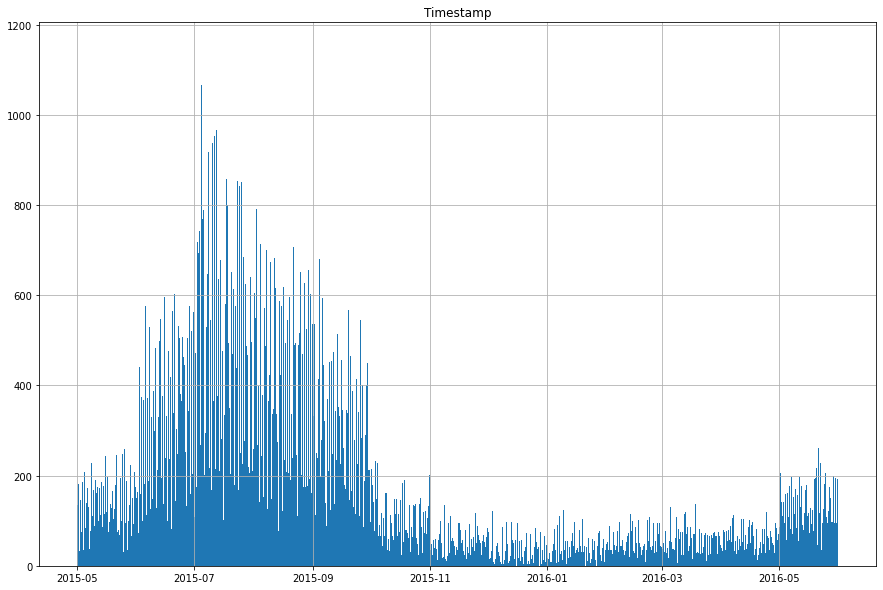

In [370]:
#Visualize distribution of each column & outliers
data.hist(bins=1000, figsize=(15, 10))

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


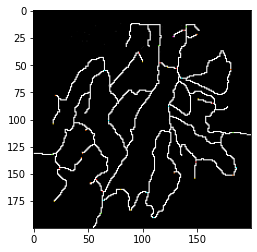

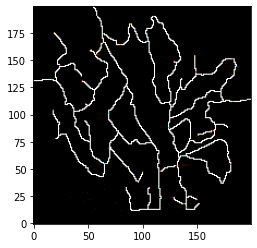

(<matplotlib.image.AxesImage at 0x132cabfd0>, None, None)

In [371]:
#load in bmp
img = cv2.imread('Lekagul Roadways.bmp')
flip = img[::-1,:,:]
#bmp = img.convert(mode="RGB")
pixel_values = flip[:,:,::-1]
print(pixel_values)
plt.imshow(flip[:,:,::-1],vmin=0,vmax=255), plt.show()
plt.imshow(flip[:,:,::-1]), plt.gca().invert_yaxis(), plt.show()

In [372]:
#color names
# (0, 0, 0), black
#  (0, 255, 255), cyan
#  (1, 1, 1), black
#  (2, 2, 2), black
#  (3, 3, 3), black
#  (5, 5, 5), black
#  (6, 6, 6), black
#  (8, 8, 8), black
#  (9, 9, 9), black
#  (14, 14, 14), black
#  (16, 16, 16),black
#  (17, 17, 17),black
#  (18, 18, 18),black
#  (19, 19, 19),black
#  (20, 20, 20),black
#  (21, 21, 21),black
#  (22, 22, 22),black
#  (23, 23, 23),black
#  (24, 24, 24),black
#  (25, 25, 25),black
#  (31, 31, 31),black
#  (46, 46, 46),black
#  (64, 64, 64),black
#  (65, 65, 65),black
#  (66, 66, 66),black
#  (67, 67, 67),black
#  (68, 68, 68),black
#  (70, 70, 70),black
#  (72, 72, 72),black
#  (76, 255, 0),green
#  (239, 239, 239),yellow
#  (255, 0, 0),red
#  (255, 0, 220),pink
#  (255, 106, 0),orange
#  (255, 216, 0),orange
#  (255, 255, 255),white

In [373]:
#create np.array grid
# replace color values with sensor names
# 'R' signifies a road
# '.' signifies empty space
grid = [['.' for i in range(200)] for j in range(200)]

for y in range(len(pixel_values)):
    for x in range(len(pixel_values[y])):
        if (pixel_values[x][y] == [0, 255, 255]).all():
            grid[x][y] = 'General_Gate'
        elif (pixel_values[x][y] == [76, 255, 0]).all():
            grid[x][y] = 'Entrance'
        elif ((pixel_values[x][y] == [255, 216, 0]).all()):
            grid[x][y] = 'Ranger_Stop'
        elif (pixel_values[x][y] == [255, 0, 0]).all():
            grid[x][y] = 'Gate'
        elif (pixel_values[x][y] == [255, 0, 220]).all():
            grid[x][y] = 'Ranger_Base'
        elif (pixel_values[x][y] == [255, 106, 0]).all():
            grid[x][y] = 'Camping'
        elif (pixel_values[x][y] == [255, 255, 255]).all():
            grid[x][y] = 'R'
        else:
            continue

print(grid)

In [374]:
#get just the coordinates of the sensors

color_map = []
for x in range(len(grid)):
    for y in range(len(grid[x])):
        if grid[x][y] == ".":
            continue
        else:
            color_map.append([grid[x][y], (y,x)])

print(color_map)

In [375]:
#Still having issues with x,y axis
# Flipped coordinates for color mapping in grid
sensors_dict = defaultdict(list)
for x in color_map:
    if x[0] == 'R':
        continue
    else:
        sensors_dict[x[0]].append(x[1])

#'Entrance':
#   (140, 15) 4
#   (115, 32) 3
#   (183, 112) 2
#   (17, 132) 1
#   (62, 186) 0
#'Gate':
#   (138, 18) 8
#   (97, 39) 7
#   (116, 48) 6
#   (131, 53) 5
#   (164, 85) 4
#   (149, 139) 3
#   (24, 145) 2
#   (58, 155) 1
#   (63, 166) 0
#'Camping':
#   (150, 22) 6
#   (181, 54) 7
#   (20, 78) 5
#   (48, 110) 4
#   (45, 131) 2
#   (44, 135) 3
#   (129, 149) 1
#   (183, 151) 8
#   (52, 158) 0
#'Ranger_Base':
#   (128, 24)
#'Ranger_Stop':
#   (100, 47) 7
#   (123, 52) 6
#   (151, 81) 5
#   (18, 104) 4
#   (148, 154) 3
#   (80, 164) 2
#   (19, 175) 1
#   (89, 183) 0
#'General_Gate':
#   (65, 55) 7
#   (136, 62) 6
#   (124, 88) 5
#   (69, 101) 4
#   (186, 144) 3
#   (104, 167) 2
#   (64, 174) 1
#   (110, 190) 0

In [376]:
#dictionary with car id and car type as key
car_id_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    car_id_dict[(data['car-id'][x], data['car-type'][x])].append((data['Timestamp'][x], data['gate-name'][x]))

          1      2     2P      3      4      5     6
2     487.0  408.0    NaN  241.0  227.0  146.0  77.0
3     225.0  180.0    NaN  104.0  134.0   86.0  36.0
4     393.0  294.0    NaN  184.0  129.0   84.0  52.0
5     218.0  101.0    NaN   68.0    NaN    NaN   NaN
6    1145.0  719.0    6.0  457.0  244.0  168.0  87.0
7     780.0  584.0    NaN  332.0  243.0  165.0  71.0
8     335.0  258.0   25.0  164.0  135.0   76.0  47.0
9     732.0  502.0    NaN  299.0  106.0   92.0  36.0
10    154.0   66.0   29.0   68.0    2.0    NaN   NaN
11    922.0  469.0    NaN  335.0    1.0    NaN   NaN
12    744.0  439.0   14.0  288.0    NaN    NaN   NaN
13    266.0  165.0    2.0  113.0    NaN    NaN   NaN
14    269.0  113.0   58.0  112.0   23.0    NaN   NaN
15      1.0    2.0    9.0    NaN    NaN    NaN   NaN
16    354.0  165.0   26.0  129.0    NaN    NaN   NaN
17    243.0  134.0    7.0   70.0    NaN    NaN   NaN
18    199.0  107.0   34.0   66.0    NaN    NaN   NaN
19      1.0    2.0  230.0    1.0    NaN    NaN

<Figure size 3600x2520 with 0 Axes>

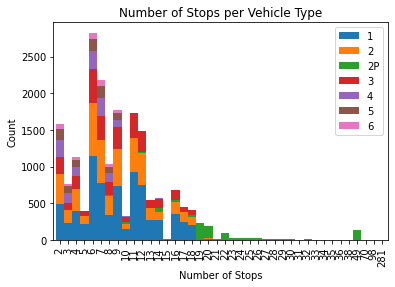

In [377]:
#Graph number of stops per type of vehicle

car_keys = list(car_id_dict.keys())
car_count = list(map(len, car_id_dict.values()))
group_car_dict = defaultdict(list)
for x in range(len(car_count)):
    group_car_dict[car_count[x]].append(car_keys[x][1])
for x in group_car_dict:
    group_car_dict[x] = collections.Counter(group_car_dict[x])
group_car_df = pd.DataFrame(group_car_dict).T.sort_index()
group_car_df = group_car_df.reindex(sorted(group_car_df.columns), axis=1)
print(group_car_df)
plt.figure(figsize=(50, 35))
group_car_df.plot.bar(stacked=True, width=1, align='center')
plt.xlabel("Number of Stops")
plt.ylabel("Count")
plt.title("Number of Stops per Vehicle Type")
plt.show()

In [378]:
#dictionary with timestamp as key
time_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    time_dict[data['Timestamp'][x]].append((data['car-id'][x], data['gate-name'][x], data['car-type'][x]))

                     car-id  car-type  gate-name
Timestamp                                       
2015-05-01 00:00:00       1         1          1
2015-05-01 01:00:00      10        10         10
2015-05-01 02:00:00       5         5          5
2015-05-01 03:00:00      18        18         18
2015-05-01 04:00:00       7         7          7
...                     ...       ...        ...
2016-05-31 19:00:00       6         6          6
2016-05-31 20:00:00      14        14         14
2016-05-31 21:00:00       4         4          4
2016-05-31 22:00:00      17        17         17
2016-05-31 23:00:00      15        15         15

[9528 rows x 3 columns]
            car-id  car-type  gate-name
Timestamp                              
2015-05-31   10561     10561      10561
2015-06-30   25279     25279      25279
2015-07-31   39518     39518      39518
2015-08-31   31845     31845      31845
2015-09-30   22907     22907      22907
2015-10-31    8108      8108       8108
2015-11-30    3816

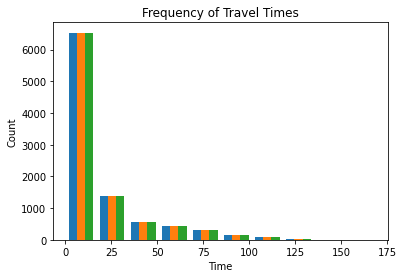

In [379]:
#
#
#
#
# sort by day, month, year, season, time of day.
# NOT ALL AT ONCE THOUGH
#
#
#
#
time_hour = data.groupby(pd.Grouper(key='Timestamp', freq="1H")).count()
time_hour.columns = time_hour.columns.to_flat_index()
print(time_hour)
time_month = data.groupby(pd.Grouper(key='Timestamp', freq="1M")).count()
print(time_month)
time_day = data.groupby(pd.Grouper(key='Timestamp', freq="1D")).count()
print(time_day)
time_min = data.groupby(pd.Grouper(key='Timestamp', freq="1m")).count()
print(time_min)
plt.hist(time_hour)
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Frequency of Travel Times")
plt.show()

In [380]:
#dictionary with vehicle type as key
car_type_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    car_type_dict[data['car-type'][x]].append((data['Timestamp'][x], data['gate-name'][x], data['car-id'][x]))



In [381]:
#dictionary with sensor name as key
gate_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    gate_dict[data['gate-name'][x]].append((data['car-id'][x], data['Timestamp'][x], data['car-type'][x]))


In [382]:
#create graph class

class Graph(object):

    def __init__(self, graph_dict=None):
        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict
    def edges(self, vertex):
        return self._graph_dict[vertex]
    def all_vertices(self):
        return set(self._graph_dict.keys())
    def all_edges(self):
        return self._generate_edges()
    def add_vertex(self, vertex):
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []
    def add_edge(self, edge):
        edge = set(edge)
        v1, v2 = tuple(edge)
        for x, y in [(v1, v2), (v2, v1)]:
            for x in self._graph_dict:
                self._graph_dict[x].add(y)
            else:
                self._graph_dict[x] = [y]
    def _generate_edges(self):
        edges = []
        for vertex in self._graph_dict:
            for neighbor in self._graph_dict[vertex]:
                if {neighbor, vertex} not in edges:
                    edges.append({vertex, neighbor})
        return edges
    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj
    def __next__(self):
        return next(self._iter_obj)
    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self._generate_edges():
            res += str(edge) + " "
        return res

In [383]:
#create graph of all sensors

g = {"Entrance_0": {'General_gate_1', 'Gate_0', 'General_gate_4', 'General_gate_7', 'Gate_7', 'Gate_6', 'Entrance_3'},
     "Entrance_1": {'Gate_2', 'Camping_2', 'Camping_3', 'Camping_4', 'Camping_0', 'Gate_1', 'General_gate_7'},
     "Entrance_2": {'General_gate_3', 'Gate_3', 'Camping_8', 'Camping_1', 'General_gate_0', 'General_gate_2', 'General_gate_5', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "Entrance_3": {'Gate_6', 'Gate_7', 'General_gate_7', 'General_gate_4', 'Gate_0', 'General_gate_1', 'Entrance_0'},
     "Entrance_4": {'Gate_8', 'Camping_6', 'Gate_5', 'General_gate_6', 'Gate_4', 'Entrance_2', 'General_gate_3', 'General_gate_5', 'Gate_3', 'Camping_8', 'Camping_1', 'General_gate_0', 'General_gate_2'},
     "Gate_0": {'Gate_1', 'Entrance_0', 'General_gate_1', 'General_gate_4', 'Gate_6', 'Entrance_3', 'General_gate_7', 'Gate_7'},
     "Gate_1": {'Camping_0', 'Gate_0', 'Camping_3', 'Camping_4', 'Entrance_1', 'Gate_2', 'Camping_2', 'General_gate_7'},
     "Gate_2": {'Ranger_stop_1', 'Camping_2', 'Entrance_1', 'Camping_4', 'Camping_3', 'Camping_0', 'Gate_1', 'General_gate_7'},
     "Gate_3": {'Ranger_stop_3', 'Camping_8', 'Camping_1', 'General_gate_0', 'General_gate_2', 'General_gate_5', 'General_gate_3', 'Entrance_2', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "Gate_4": {'Ranger_stop_5', 'Entrance_2', 'General_gate_3', 'General_gate_5', 'Gate_3', 'Camping_8', 'Camping_1', 'General_gate_0', 'General_gate_2', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "Gate_5": {'Ranger_stop_6', 'Camping_6', 'Gate_8', 'Entrance_4', 'General_gate_6', 'General_gate_5', 'Gate_4', 'Entrance_2', 'General_gate_3', 'Camping_8', 'Gate_3', 'Camping_1', 'General_gate_0', 'General_gate_0'},
     "Gate_6": {'Ranger_stop_6', 'Entrance_3', 'Entrance_0', 'General_gate_1', 'Gate_0', 'General_gate_4', 'General_gate_7', 'Gate_7'},
     "Gate_7": {'Ranger_stop_7', 'General_gate_7', 'General_gate_4', 'Gate_6', 'Entrance_3', 'Gate_0', 'General_gate_1', 'Entrance_0'},
     "Gate_8": {'Ranger_base', 'Entrance_4', 'Camping_6', 'Gate_5', 'General_gate_6', 'General_gate_5', 'Gate_4', 'Entrance_2', 'General_gate_3', 'Camping_8', 'Gate_3', 'Camping_1', 'General_gate_0', 'General_gate_2'},
     "Camping_0": {'Gate_1', 'Camping_3', 'Camping_4', 'Entrance_1', 'Gate_2', 'Camping_2', 'General_gate_7'},
     "Camping_1": {'General_gate_0', 'General_gate_2', 'General_gate_5', 'Gate_3', 'Camping_8', 'General_gate_3', 'Entrance_2', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "Camping_2": {'Gate_2', 'Entrance_1', 'Camping_4', 'Camping_3', 'Camping_0', 'Gate_1', 'General_gate_7'},
     "Camping_3": {'Gate_1', 'Camping_0', 'Camping_4', 'Entrance_1', 'Gate_2', 'Camping_2', 'General_gate_7'},
     "Camping_4": {'General_gate_7', 'Gate_1', 'Camping_0', 'Camping_3', 'Entrance_1', 'Gate_2', 'Camping_2'},
     "Camping_5": {'Ranger_stop_4', 'General_gate_7'},
     "Camping_6": {'Entrance_4', 'Gate_8', 'Gate_5', 'General_gate_6', 'General_gate_5', 'Gate_4', 'Entrance_2', 'General_gate_3', 'Gate_3', 'Camping_8', 'Camping_1', 'General_gate_0', 'General_gate_2'},
     "Camping_7": {'General_gate_6'},
     "Camping_8": {'General_gate_3', 'Gate_3', 'Camping_1', 'General_gate_0', 'General_gate_2', 'General_gate_5', 'Entrance_2', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "General_gate_0": {'General_gate_2', 'Camping_1', 'Gate_3', 'Camping_8', 'General_gate_5', 'General_gate_3', 'Entrance_2', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "General_gate_1": {'Entrance_0', 'Gate_0', 'Ranger_stop_2', 'General_gate_4', 'Gate_6', 'Entrance_3', 'General_gate_7', 'Gate_7'},
     "General_gate_2": {'Ranger_stop_0', 'General_gate_0', 'Camping_1', 'General_gate_5', 'Gate_3', 'Camping_8', 'General_gate_3', 'Entrance_2', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "General_gate_3": {'Camping_8', 'Entrance_2', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4', 'General_gate_5', 'Gate_3', 'Camping_1', 'General_gate_0', 'General_gate_2'},
     "General_gate_4": {'Entrance_0', 'General_gate_1', 'Gate_0', 'Gate_6', 'Entrance_3', 'Gate_7', 'General_gate_7'},
     "General_gate_5": {'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4', 'General_gate_6', 'Gate_4', 'Entrance_2', 'General_gate_3', 'Camping_8', 'Gate_3', 'Camping_1', 'General_gate_0', 'General_gate_2'},
     "General_gate_6": {'Camping_7', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4', 'General_gate_5', 'Gate_4', 'Entrance_2', 'General_gate_3', 'Camping_8', 'Gate_3', 'Camping_1', 'General_gate_0', 'General_gate_2'},
     "General_gate_7": {'Camping_5', 'Ranger_stop_4', 'Gate_7', 'General_gate_4', 'Gate_6', 'Entrance_3', 'Entrance_1', 'Gate_2', 'Camping_2', 'Camping_4', 'Camping_3', 'Camping_0', 'Gate_1', 'Gate_0', 'General_gate_1', 'Entrance_0'},
     "Ranger_stop_0": {'Ranger_stop_2', 'General_gate_2'},
     "Ranger_stop_1": {'Gate_2'},
     "Ranger_stop_2": {'Ranger_stop_0', 'General_gate_1'},
     "Ranger_stop_3": {'Gate_3'},
     "Ranger_stop_4": {'Camping_5', 'General_gate_7'},
     "Ranger_stop_5": {'Gate_4'},
     "Ranger_stop_6": {'Gate_5', 'Gate_6'},
     "Ranger_stop_7": {'Gate_7'},
     "Ranger_base": {'Gate_8'},
     }

g = Graph(g)

In [384]:
#sort card id dictionary by timestamp
#this will show the 'path' of each car over time
car_sorted = {x:sorted(car_id_dict[x]) for x in car_id_dict.keys()}

In [385]:
#Example to make sure times are sorted ascending
print(car_id_dict[('20154301124328-262', '4')])

In [386]:
# track individual cars
print("Number of individual cars:",len(data['car-id'].unique()))

In [387]:
# separate out by month to see trends
data['month'] = [d.strftime('%b') for d in data.Timestamp]
data.head()

,Timestamp,car-id,car-type,gate-name,month
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,May
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,May
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,May
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,May
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,May


<AxesSubplot:xlabel='month', ylabel='count'>

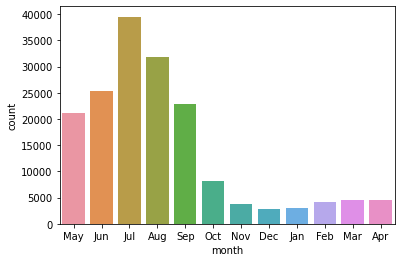

In [388]:
# visualize data overall
sns.countplot(x=data.month)

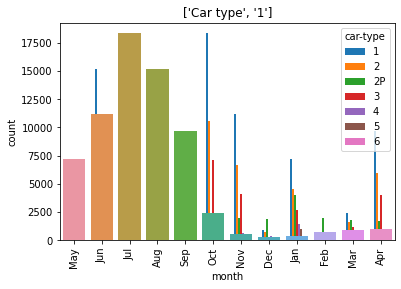

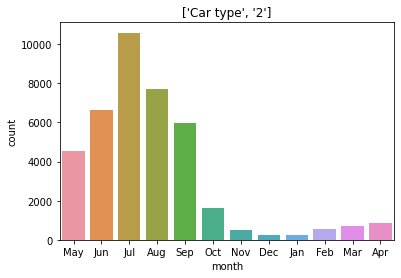

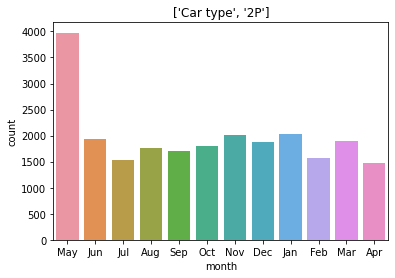

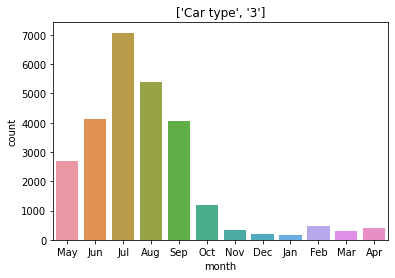

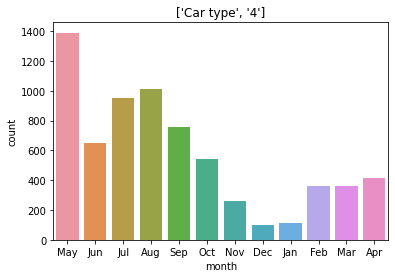

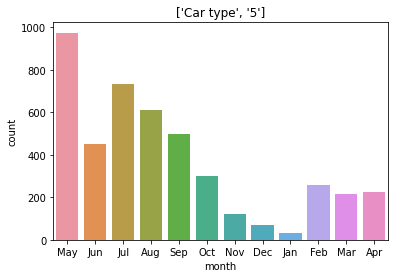

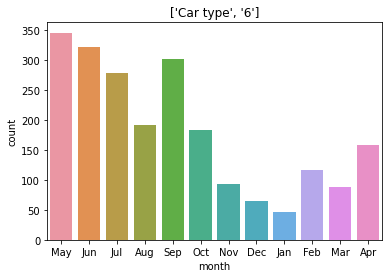

In [407]:
#could use some fixing up visually, but all the graphs can be put into 1
month_df = data.groupby(['month', 'car-type']).size().unstack(level=1)
month_df.plot(kind='bar')

# visualize data grouped by car type and month
# for t in sorted(data['car-type'].unique()):
#     sns.countplot(x=data.month[data['car-type']==t]).set(title=["Car type", t])
#     plt.show()


In [408]:
# separate out by weekdays
data['day'] = [calendar.day_name[int(d.weekday())] for d in data.Timestamp]
data['days'] = [d.weekday() for d in data.Timestamp]
data['hours'] = [d.hour for d in data.Timestamp]
data.head()

,Timestamp,car-id,car-type,gate-name,month,day,days
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,May,Friday,4
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,May,Friday,4
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,May,Friday,4
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,May,Friday,4
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,May,Friday,4


<AxesSubplot:xlabel='day'>

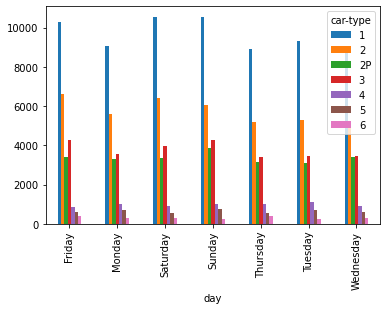

In [414]:
# visualize data grouped by car type and week days
# for t in sorted(data['car-type'].unique()):
#     sns.countplot(x=data.groupby(['month', 'days'])[data['car-type']==t]).set(title=["Car type", t])
#     plt.show()

#could use some fixing up visually, but all the graphs can be put into 1
day_df = data.groupby(['day', 'car-type']).size().unstack(level=1)
day_df.plot(kind='bar')

In [ ]:
# this attempt gives no real information
groups = data.groupby(['month', 'days', 'car-type']).size()

In [ ]:
# attempt to use pivot tables for visualization; 
info = data.pivot_table(index="month",columns="days",values="car-type",aggfunc="sum")
sns.heatmap(info)

In [ ]:
# a heatmap attempt 
sns.heatmap(data.groupby(['month', 'days', 'car-type']).size()[:, np.newaxis])

In [ ]:
# another heatmap attempt
times = np.asarray(data.days).reshape(171477,1)
sns.heatmap(times)

In [ ]:
# this attempt did not work to separate out cars by type
graph = data.set_index('day')
print(graph.head())
graph.groupby('day').count()['car-type'].plot(legend=True)

In [ ]:
g = data.groupby('month')['car-type'].value_counts()
g.head()


In [ ]:
g.plot(legend=True)

In [ ]:
p = data.groupby(['month', 'car-type']).size()
p.head()

In [ ]:
p.unstack().plot(legend=True)

In [ ]:
l = data.groupby(['days','car-type']).size()
l.unstack().plot(legend=True)

In [ ]:
m = data.groupby(['month','days','car-type']).size()
m.unstack().plot(legend=True)

In [ ]:
m = data.groupby(['gate-name','car-type']).size()
m.unstack().plot(legend=True)

In [ ]:
n = data.groupby(['hours', 'car-type']).size()
n.unstack().plot(legend=True)

In [ ]:
# another heatmap attempt. not having luck with not having duplicate indexes...???
data["months2"] = pd.Categorical(data["month"], data.month.unique())
data["days2"] = pd.Categorical(data["days"], data.days.unique())
data["cars2"] = pd.Categorical(data["car-type"], data["car-type"].unique())
car_matrix = data.pivot("months2","days","car-type")
r = sns.heatmap (car_matrix, cmap='BuPu')